<a href="https://colab.research.google.com/github/ryavasani/Comparative-Analysis-of-LSTM-GRU-and-ARIMA-Models-for-Stock-Market-Price-Prediction/blob/main/RushilYavasani_ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/AAPL_Train_Final.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-30,36.112499,36.240002,35.945000,36.005001,33.836697,92096400
1,2017-07-03,36.220001,36.325001,35.775002,35.875000,33.714531,57111200
2,2017-07-05,35.922501,36.197498,35.680000,36.022499,33.853157,86278400
3,2017-07-06,35.755001,35.875000,35.602501,35.682499,33.533619,96515200
4,2017-07-07,35.724998,36.187500,35.724998,36.044998,33.874290,76806800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1509 non-null   object 
 1   Open       1509 non-null   float64
 2   High       1509 non-null   float64
 3   Low        1509 non-null   float64
 4   Close      1509 non-null   float64
 5   Adj Close  1509 non-null   float64
 6   Volume     1509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.6+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,98.226026,99.383698,97.151738,98.322850,96.689113,1.117105e+08
std,49.044123,49.655073,48.479287,49.100598,49.424617,5.401959e+07
min,35.724998,35.875000,35.500000,35.547501,33.533619,3.519590e+07
25%,47.952499,48.520000,47.724998,48.070000,46.146084,7.589120e+07
50%,91.102501,92.197502,90.000000,91.199997,89.419556,9.743360e+07
75%,145.490005,147.229996,144.100006,145.860001,144.468613,1.310633e+08
max,189.080002,190.070007,188.940002,189.589996,189.334320,4.265100e+08


In [ ]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

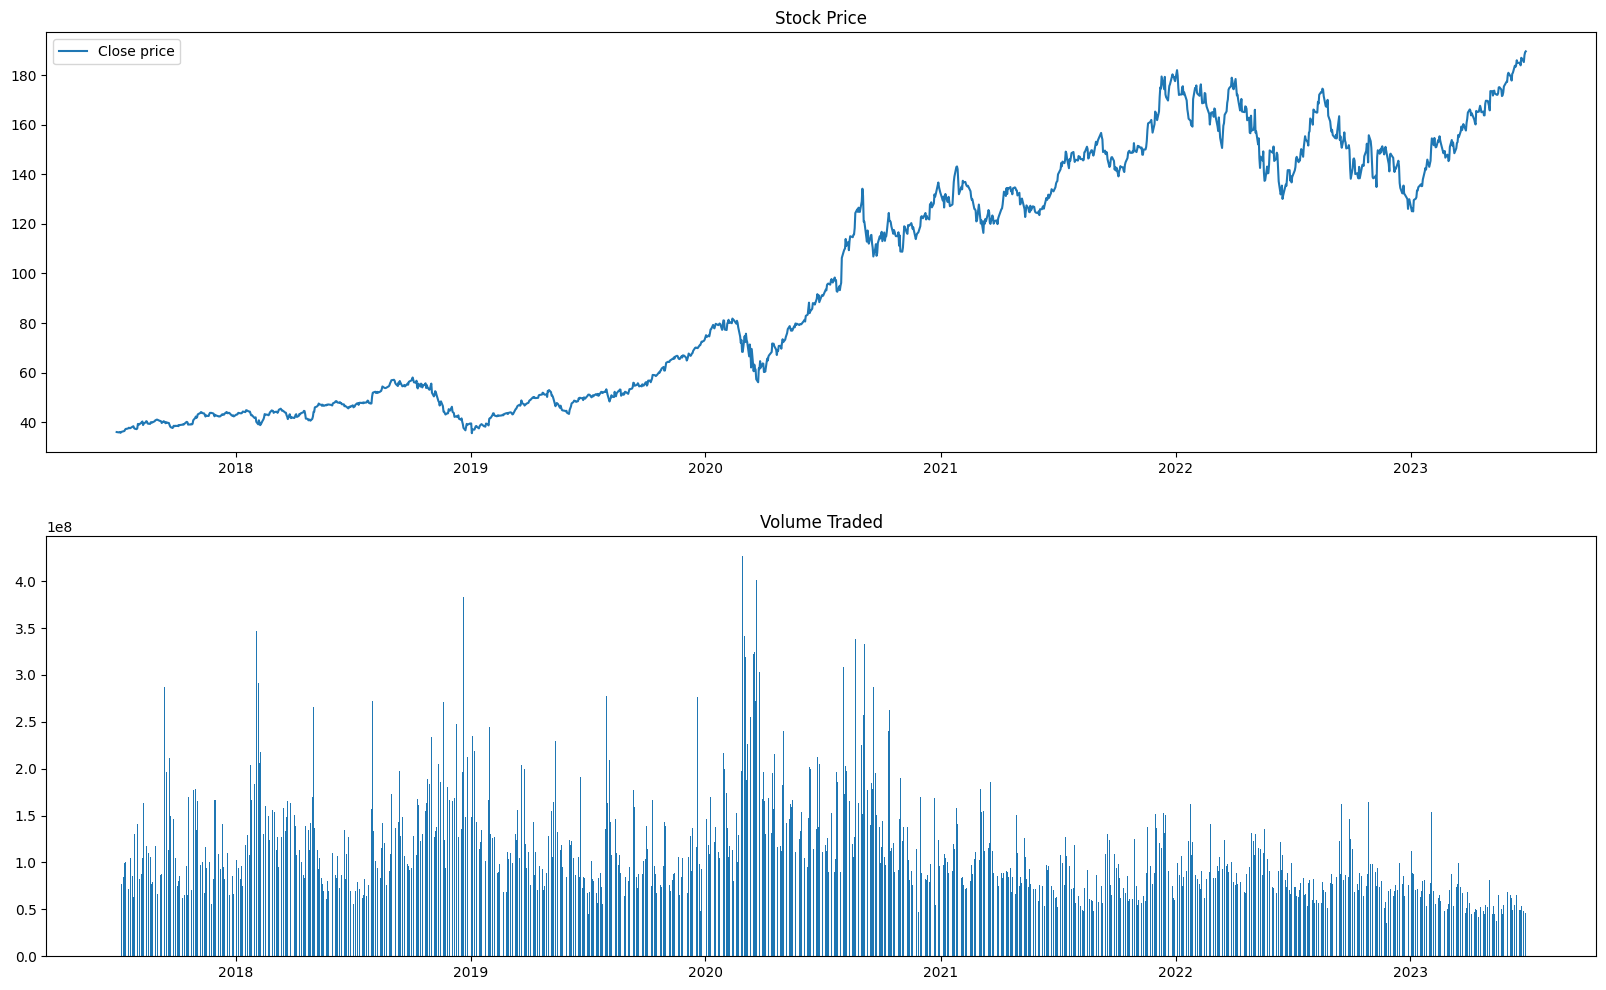

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Stock Price')
plt.plot(df2.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()


# ARIMA Model


In [ ]:
data = list(df2["Close"])

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -0.22467843335455906
2. P-Value :  0.9355153691032739
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression: 1497
5. Critical Values :
	 1% :  -3.434725783926551
	 5% :  -2.863472629385615
	 10% :  -2.567798908763865


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.0 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

In [ ]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6555.625, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6554.497, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6552.124, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6551.798, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6555.963, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6551.734, Time=1.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6555.794, Time=1.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6553.520, Time=1.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6551.980, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6552.320, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6554.045, Time=0.56 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 6.592 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1

In [ ]:
import statsmodels.api as sm
#Best model
model = sm.tsa.arima.ARIMA(data, order=(1,1,1))

In [ ]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1509
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3274.023
Date:                Wed, 30 Aug 2023   AIC                           6554.045
Time:                        03:42:09   BIC                           6570.001
Sample:                             0   HQIC                          6559.988
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4137      0.233      1.777      0.076      -0.043       0.870
ma.L1         -0.4707      0.228     -2.068      0.039      -0.917      -0.025
sigma2         4.5011      0.097     46.426      0.000       4.311       4.691
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               984.35
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              14.13   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([154.12709909, 151.71254179, 154.47513293, 151.99348547,
       150.96451218, 151.04649804, 153.70510954, 153.1688848 ,
       155.19379661, 153.73834325, 152.62954355, 148.74971466,
       149.01243028, 149.42024617, 146.87305841, 147.92769818,
       147.4427342 , 145.445253  , 145.93943128, 150.7516527 ,
       153.53917717, 151.59036981, 152.79298042, 150.68386216,
       148.66346276, 150.43452094, 152.45230576, 152.90236036,
       155.64552765, 154.95225418, 157.24055021, 159.09765055,
       157.82691514, 158.86576325, 160.14443161, 158.34273216,
       157.71547937, 160.62277106, 162.19995146, 164.67969479,
       165.99381542, 165.57788659, 163.84218261, 164.64732921,
       162.17412725, 160.93804573, 160.20493693, 165.29779048,
       165.10654992, 165.18015402, 166.37577121, 167.51944584,
       166.65387894, 165.11485655, 165.3569611 , 163.87172399,
       163.80844971, 168.16743681, 169.49332888, 169.5072622 ,
       168.56097085, 167.52207831, 165.9186611 , 173.18

In [ ]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2023-02-06    154.127099
2023-02-07    151.712542
2023-02-08    154.475133
2023-02-09    151.993485
2023-02-10    150.964512
                 ...    
2023-06-23    186.852737
2023-06-26    186.628933
2023-06-27    185.326437
2023-06-28    187.927338
2023-06-29    189.119638
Length: 100, dtype: float64

<Axes: xlabel='Date'>

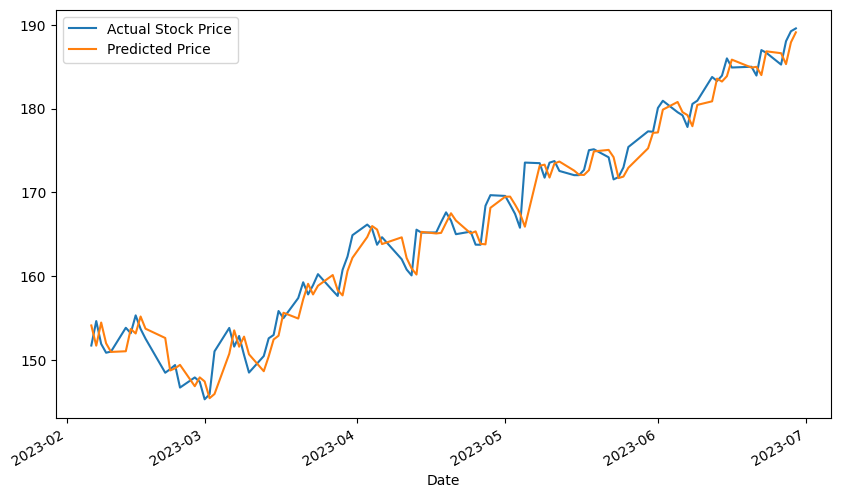

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

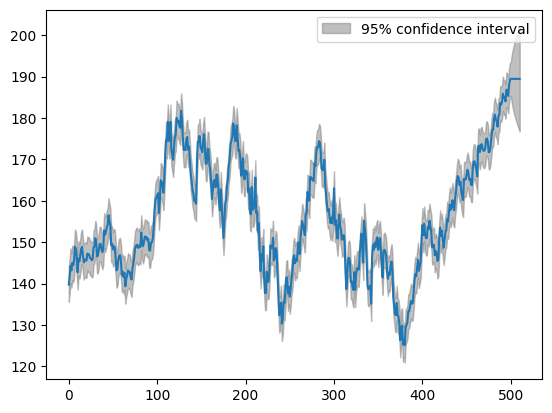

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

2.0140797042510403

In [ ]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.9727019321516277

# Predicting next 10 values

In [ ]:
pred_future = model.predict(start=end,end=end+19)
pred_future

array([189.11963809, 189.50922604, 189.47581408, 189.46199262,
       189.45627512, 189.45390997, 189.45293159, 189.45252686,
       189.45235944, 189.45229018, 189.45226153, 189.45224968,
       189.45224478, 189.45224275, 189.45224191, 189.45224156,
       189.45224142, 189.45224136, 189.45224134, 189.45224133])

In [ ]:
import datetime
start_date = datetime.datetime(2023,6,30)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(20)]

In [ ]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2023-06-30    189.119638
2023-07-01    189.509226
2023-07-02    189.475814
2023-07-03    189.461993
2023-07-04    189.456275
2023-07-05    189.453910
2023-07-06    189.452932
2023-07-07    189.452527
2023-07-08    189.452359
2023-07-09    189.452290
2023-07-10    189.452262
2023-07-11    189.452250
2023-07-12    189.452245
2023-07-13    189.452243
2023-07-14    189.452242
2023-07-15    189.452242
2023-07-16    189.452241
2023-07-17    189.452241
2023-07-18    189.452241
2023-07-19    189.452241
dtype: float64

<Axes: xlabel='Date'>

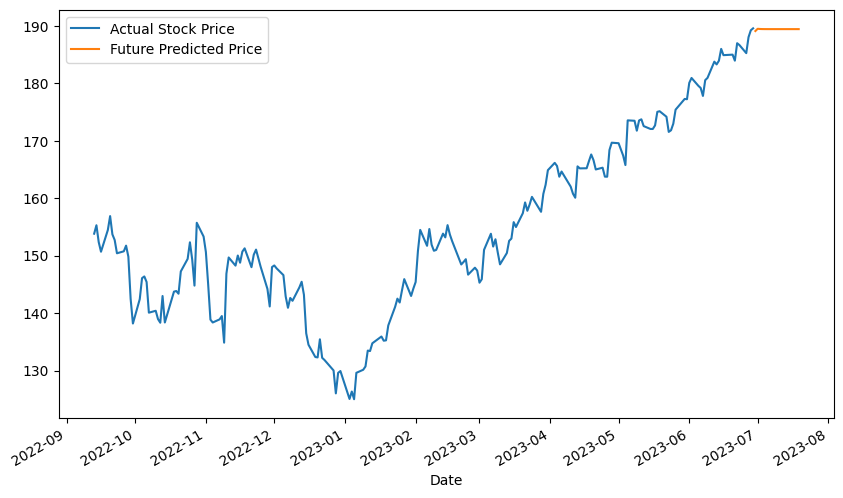

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [ ]:
check_df = pd.read_csv("/content/AAPL_Test_Final.csv")

check_df.Date= pd.to_datetime(check_df.Date)
check_df2 =check_df.set_index('Date')

In [ ]:
check_df2['Close']

Date
2023-06-30    193.970001
2023-07-03    192.460007
2023-07-05    191.330002
2023-07-06    191.809998
2023-07-07    190.679993
2023-07-10    188.610001
2023-07-11    188.080002
2023-07-12    189.770004
2023-07-13    190.539993
2023-07-14    190.690002
2023-07-17    193.990005
2023-07-18    193.729996
2023-07-19    195.100006
2023-07-20    193.130005
2023-07-21    191.940002
2023-07-24    192.750000
2023-07-25    193.619995
2023-07-26    194.500000
2023-07-27    193.220001
2023-07-28    195.830002
Name: Close, dtype: float64

In [ ]:
pred_future2

2023-06-30    189.119638
2023-07-01    189.509226
2023-07-02    189.475814
2023-07-03    189.461993
2023-07-04    189.456275
2023-07-05    189.453910
2023-07-06    189.452932
2023-07-07    189.452527
2023-07-08    189.452359
2023-07-09    189.452290
2023-07-10    189.452262
2023-07-11    189.452250
2023-07-12    189.452245
2023-07-13    189.452243
2023-07-14    189.452242
2023-07-15    189.452242
2023-07-16    189.452241
2023-07-17    189.452241
2023-07-18    189.452241
2023-07-19    189.452241
dtype: float64

In [ ]:
pred_future2.to_numpy()
np.save
np.load

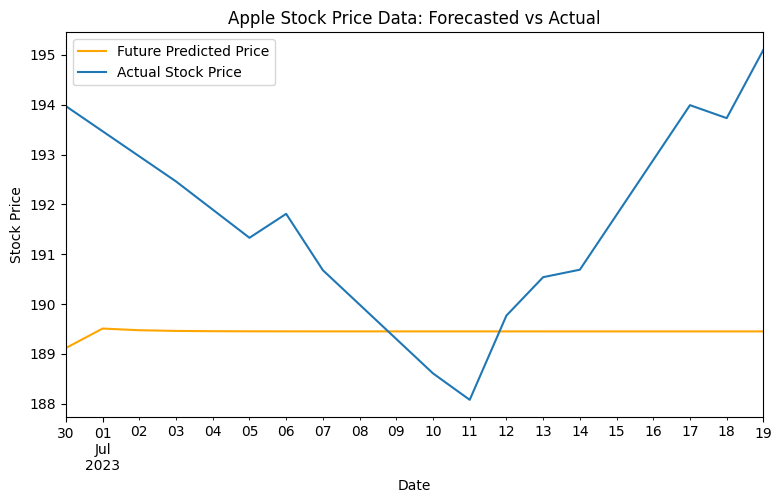

In [ ]:
plt.figure(figsize=(9,5))
plt.subplot(1, 1, 1)
pred_future2.plot(label='Future Predicted Price', legend=True, color='orange')
plt.subplot(1, 1, 1)
check_df2['Close'][:-7].plot(label='Actual Stock Price', legend=True)
plt.ylabel('Stock Price')
plt.title('Apple Stock Price Data: Forecasted vs Actual')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(check_df2['Close'],pred_future2)

12.359697839314073

In [ ]:
r2_score(check_df2['Close'],pred_future2)

-1.9503851075371617